# FINAL PROJECT 

## INTRODUCTION- Problem Definition

Hepatitis C is a liver infection caused by the hepatitis C virus (HCV). For more than half of the people who become infected with the hepatitis C virus, it becomes a long-term, chronic infection which can result in serious, even life-threatening health problems like cirrhosis and liver cancer. Hepatitis C is spread through contact with blood from an infected person and the best way to prevent hepatitis C is by avoiding behaviors that can spread the disease.

## Aim of the Project
This project aims to create a model to predict if patients will be infected with Hepatitis C based on their demographics and regular lab results.


The dataset contains data from Puerto Rican patients who have been suspected of having hepatitis C on their regular laboratory results and have taken Ab o RNA test to confirm 

In [1]:
# Load the library that is used to manipulate dataframes with the alias pd
import pandas as pd
from pandas import read_csv

# Load the library that is used to manipulate arrays with the alias np
import numpy as np

# Load dataset and store it in the variable dataset
filename = "Hepatitis C.csv"
data = read_csv(filename )

In [2]:
# Print the shape of the dataset
dim = data.shape

# Print  the summary description of the dataset
pd.set_option('display.width', 100)
summary = data.describe

# Print the first 10 lines of the dataset  
first_10 = data.head(10)

print("Dimensions of the dataset:")
print(dim)
print("Summary of the dataset:")
print(summary)
print("First 10 lines of the dataset")
print(first_10)


Dimensions of the dataset:
(1140, 21)
Summary of the dataset:
<bound method NDFrame.describe of       Hepatitis C  age-group  lab_zip  person_zip  13457-7_LDL  14957-5_Albumin  1751-7_Albumin  \
0               1       60.0      0.0       983.0     84.20000           84.284        3.500000   
1               0       65.0    909.0       926.0    104.30053           84.284        3.800000   
2               1       55.0    612.0       612.0    104.30053           84.284        3.900000   
3               0       40.0    612.0       956.0    104.30053           84.284        4.211069   
4               1       50.0    918.0         0.0    104.30053           84.284        4.211069   
...           ...        ...      ...         ...          ...              ...             ...   
1135            0       45.0      0.0       765.0    138.20000           84.284        4.400000   
1136            0       45.0      0.0       729.0     88.60000           84.284        4.300000   
1137         

From above, we observed that the data was gathered from 1140 patients of 21 features. 
Also, 918 patients were recorded not to have hepatitis C while 222 had hepatitis C (see below).

In [3]:
'''
Using the functions groupby and size, 
determine how many patients have been  
diagnosed with Hepatitis C and how many are control cases.
'''


'\nUsing the functions groupby and size, \ndetermine how many patients have been  \ndiagnosed with Hepatitis C and how many are control cases.\n'

In [3]:
grouped = data.groupby(['Hepatitis C'])
counts = grouped.size()
counts

Hepatitis C
0    918
1    222
dtype: int64

# Data Visualization

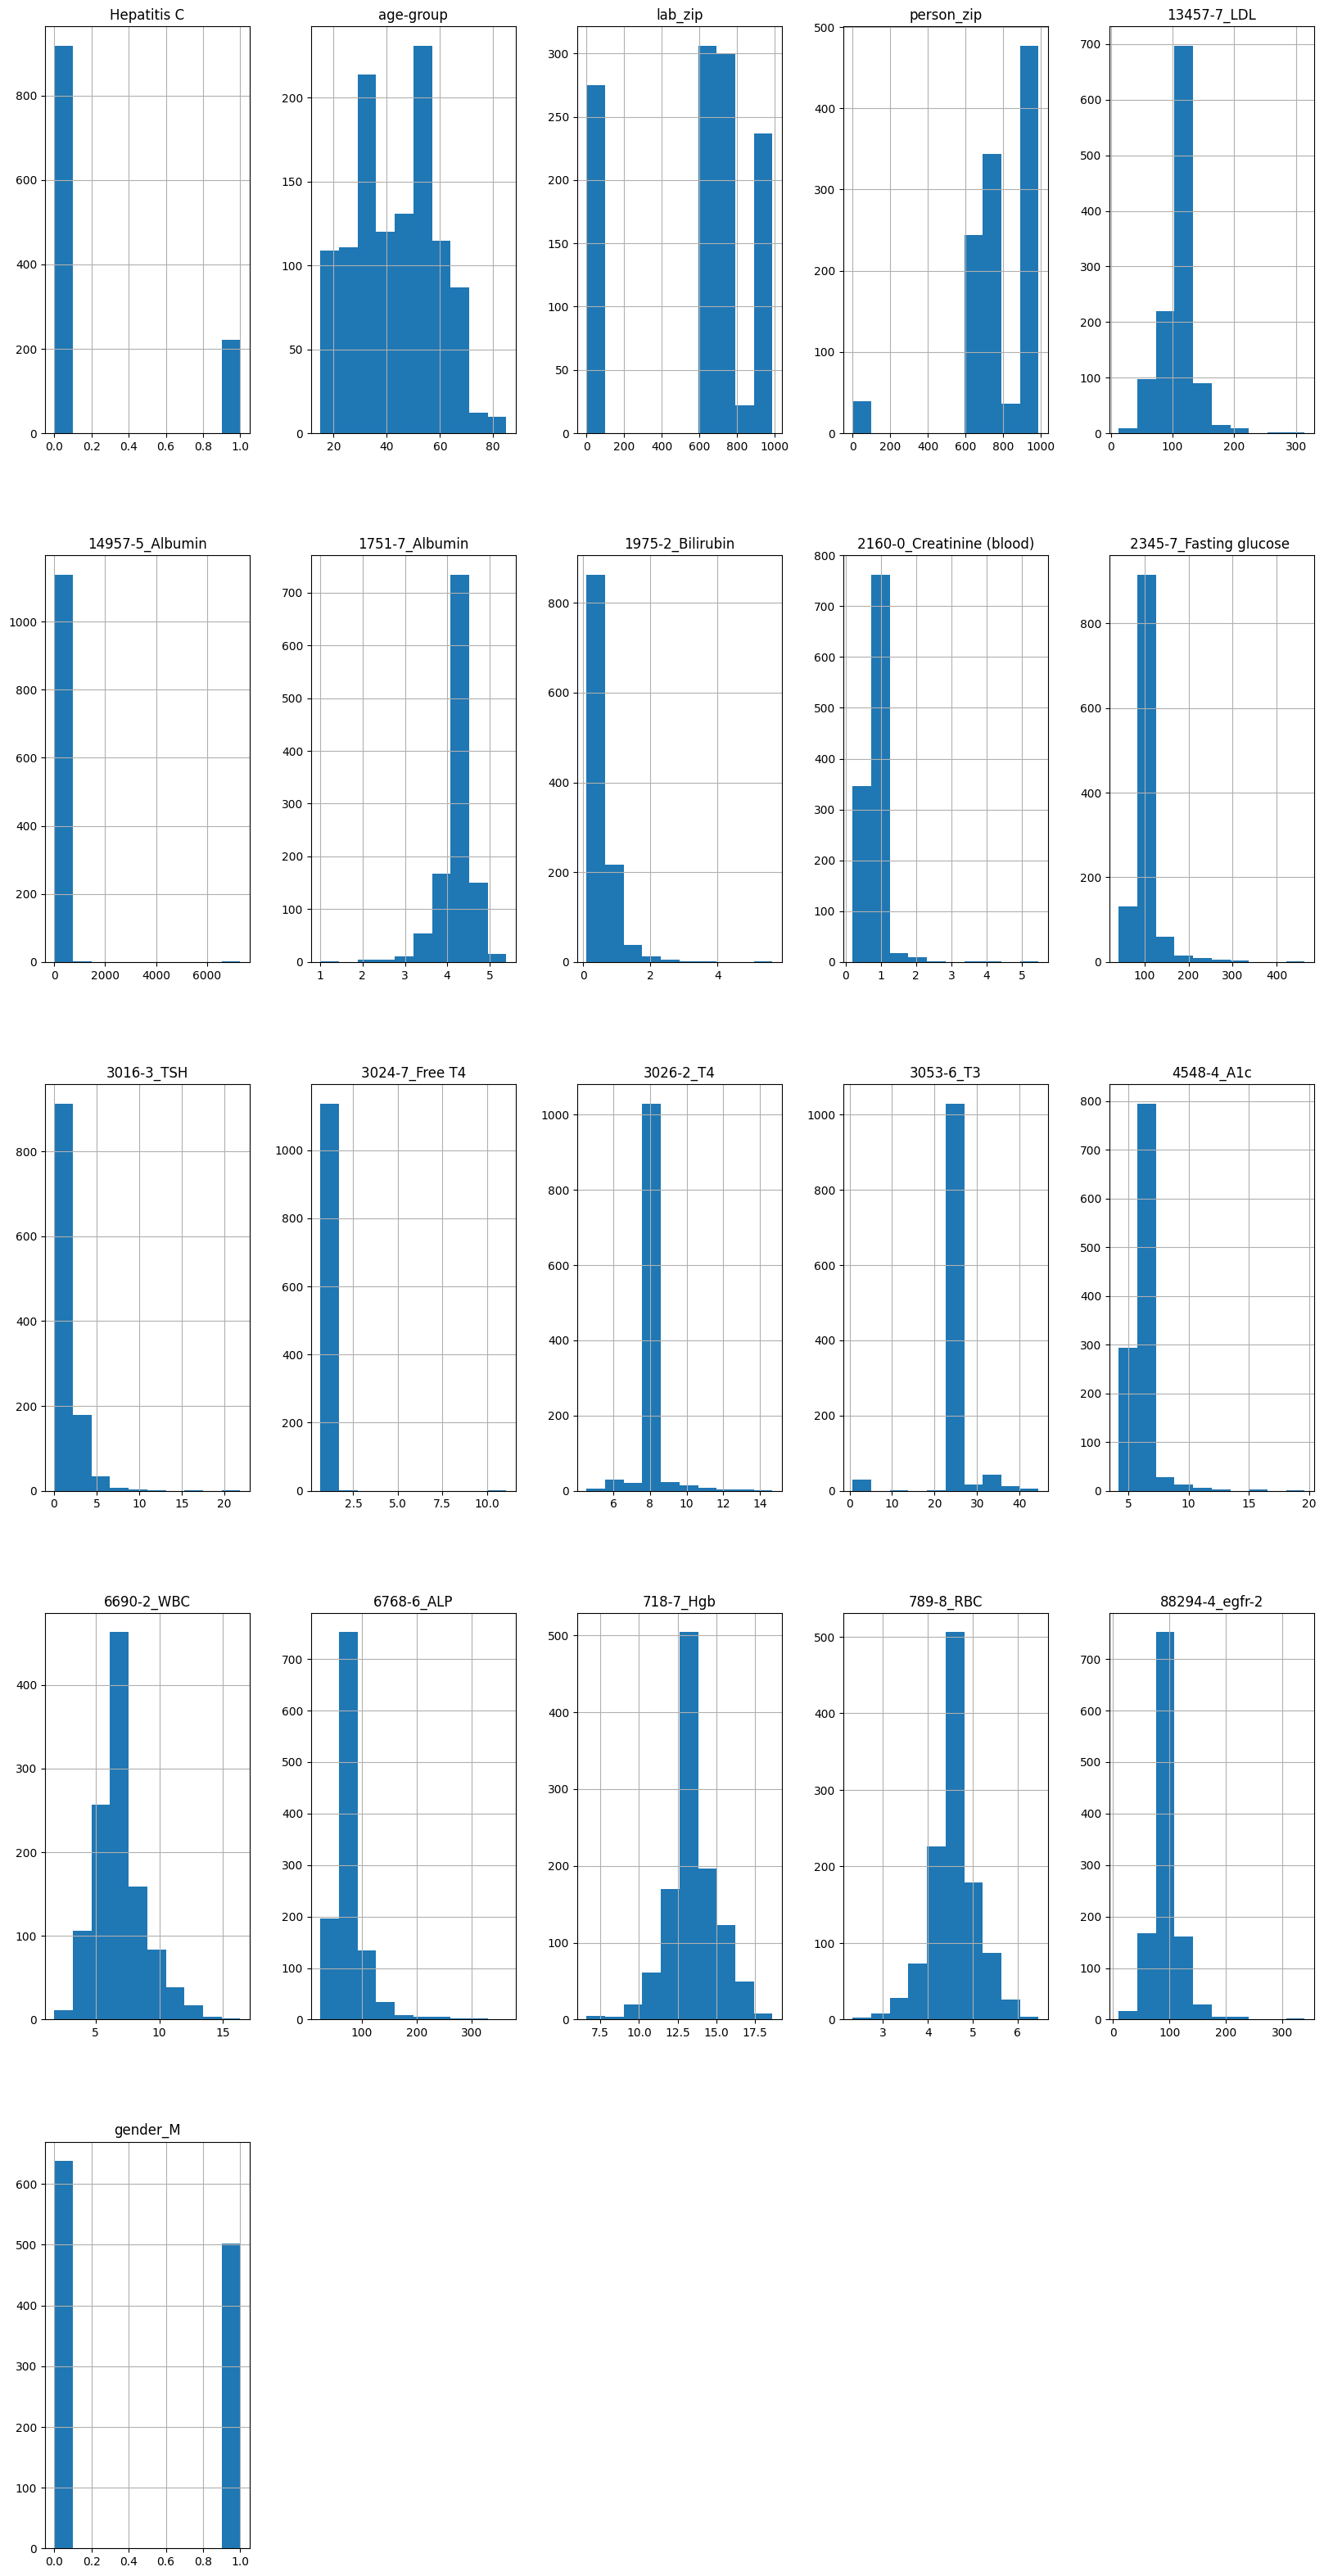

In [5]:
# Import the pyplot fuction from the matplotlib library 
from matplotlib import pyplot


# Plot the histogram of the data using the hist function
data.hist()
pyplot.rcParams["figure.figsize"] = (20,40)

# Display the plot using the show function
pyplot.show()

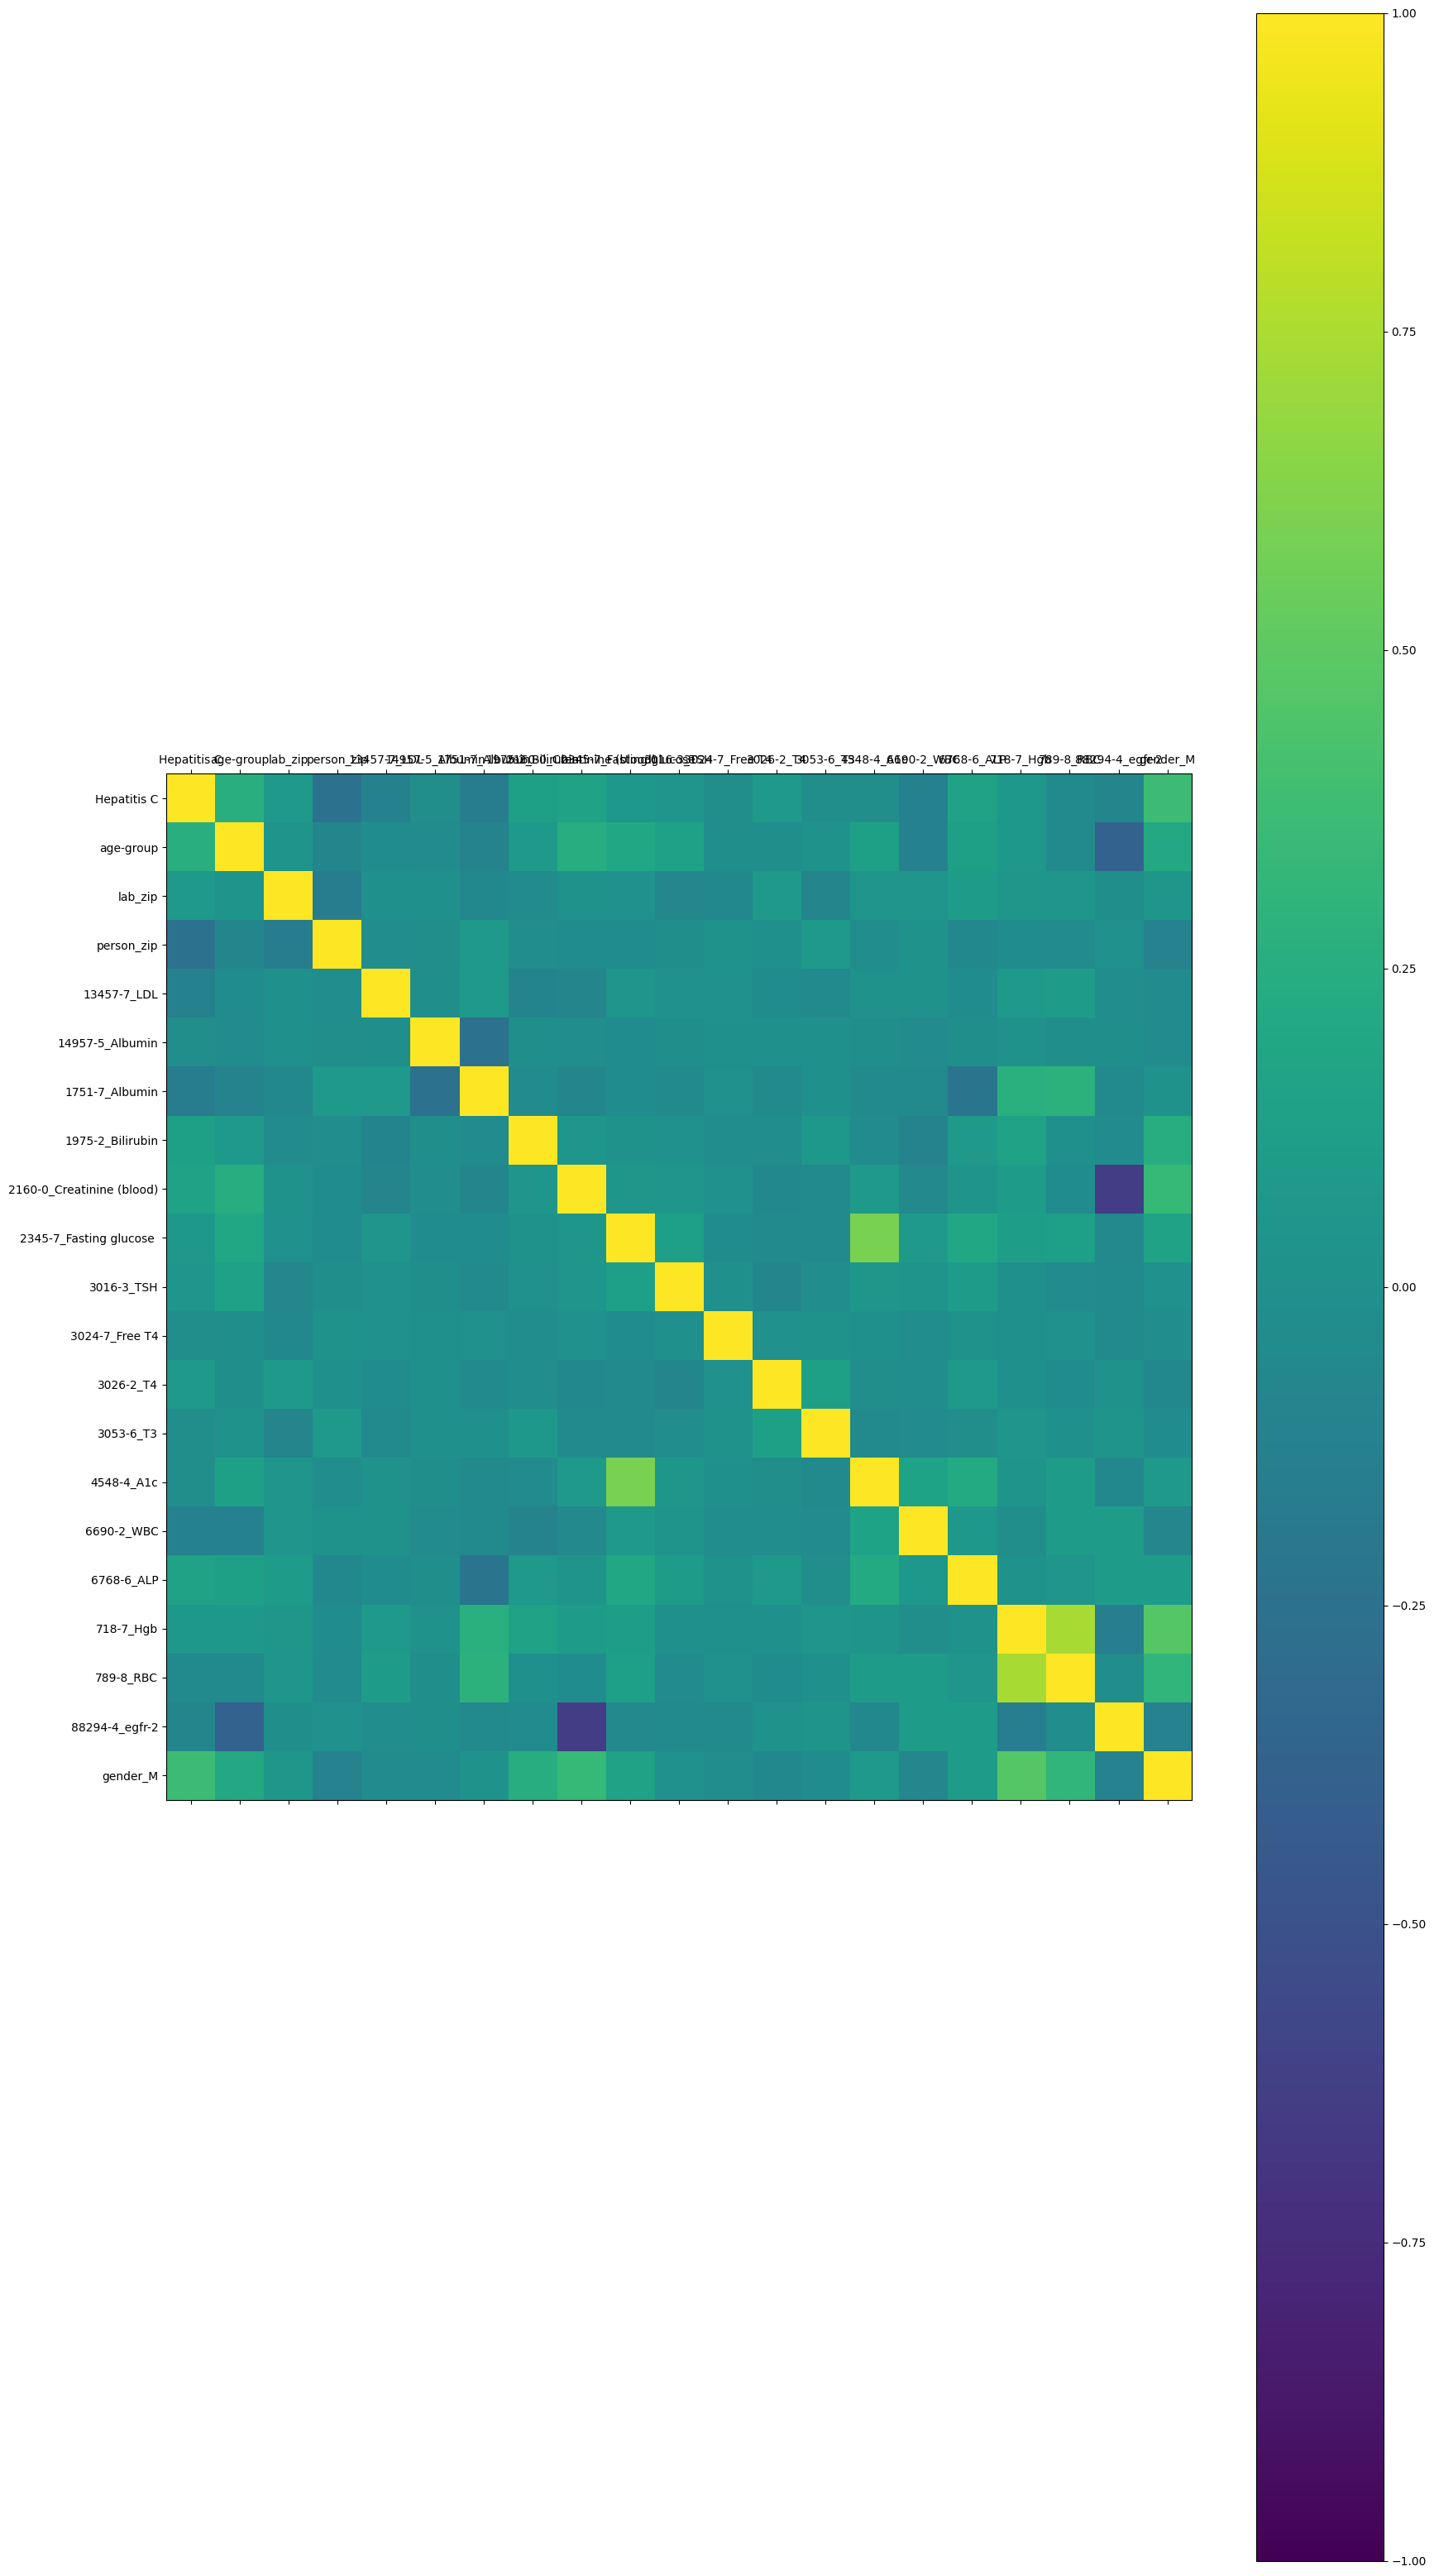

In [6]:
# Plot the correlation matrix of the data

column=data.columns
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr('pearson'), vmin=-1, vmax=1, interpolation='none')
ax.set_xticks(np.arange(len(column)))
ax.set_yticks(np.arange(len(column)))
ax.set_xticklabels(column)
ax.set_yticklabels(column)
fig.colorbar(cax)
pyplot.show()


# Data Preparation

In [7]:


# Using the values function, convert the dataset into an array and store it into a variable
array_data = data.values

# Separate the target variable from the rest of the array using positional  indexing

X = array_data[:, 1:22]
Y = array_data[:, 0]

# Import the train_test_split from  sklearn.model_selection
from sklearn.model_selection import train_test_split

# Using the function train_test_split split-out 20% validation and 80% training dataset 

test_size = 0.20
seed = 1234
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Model Building


In [8]:
# Import the  LogisticRegression function from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Import the DecisionTreeClassifier function from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import the KNeighborsClassifier function from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import the LinearDiscriminantAnalysis function from sklearn.discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import the GaussianNB function from sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

# Import the SVC function from sklearn.svm 
from sklearn.svm import SVC

In [10]:
# Create an empty list called model
models = []

# Using the append function, add an alias for the model and the  function to the list, 
# using "liblinear" as the solver.
# This one has been done for you.
models.append(('LR', LogisticRegression(solver='liblinear')))


# Using the append function, add an alias for the Linear Discriminant Analysis model and the 
# LinearDiscriminantAnalysis function to the list.
models.append(('LDA', LinearDiscriminantAnalysis()))

# Using the append function, add an alias for the K Neighbors Classifier model and the 
# KNeighborsClassifier function to the list.
models.append(('KNN', KNeighborsClassifier()))

# Using the append function, add an alias for the Decision Tree Classifier model and the 
# DecisionTreeClassifier function to the list.
models.append(('CART', DecisionTreeClassifier()))

# Using the append function, add an alias for the Gaussian Naive Bayes model and the 
# GaussianNB function to the list.
models.append(('NB', GaussianNB()))

# Using the append function, add an alias for the Support Vector Classifier model and the 
# SVC function to the list,using 'auto' as the value for the gamma parameter.
models.append(('SVM', SVC()))

# Create an empty list called results
results = []

# Create an empty list called names
names = []




# Model Testing

In [12]:
# Now you will create a for loop to test the different models
# Import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a for loop that iterates over two variables called name and model

for name, model in models:  
# Create an instance of cross_val_score with the following parameters:
# model, X_train, Y_train, cv=10, scoring="accuracy" and store the resutls as
# a variable called cv_results

    scoring = 'accuracy'
    cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)

# Append cv_results  to the previously created empty list called results 
    results.append(cv_results)

# Append name to the previously created empty list called names
    names.append(name)

# print the name and the mean of cv_results using the fuction mean
    message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(message)




LR: 0.831235 (0.035900)
LDA: 0.824594 (0.027996)
KNN: 0.861765 (0.022969)
CART: 0.813581 (0.023671)
NB: 0.639130 (0.072516)
SVM: 0.815803 (0.015193)


From the above, using the MSE, the top 2 models are the ones with Logistic Regression and Classification Tree. It may look like Naive Bayes but it was not chosen because it had a high standard deviation. 

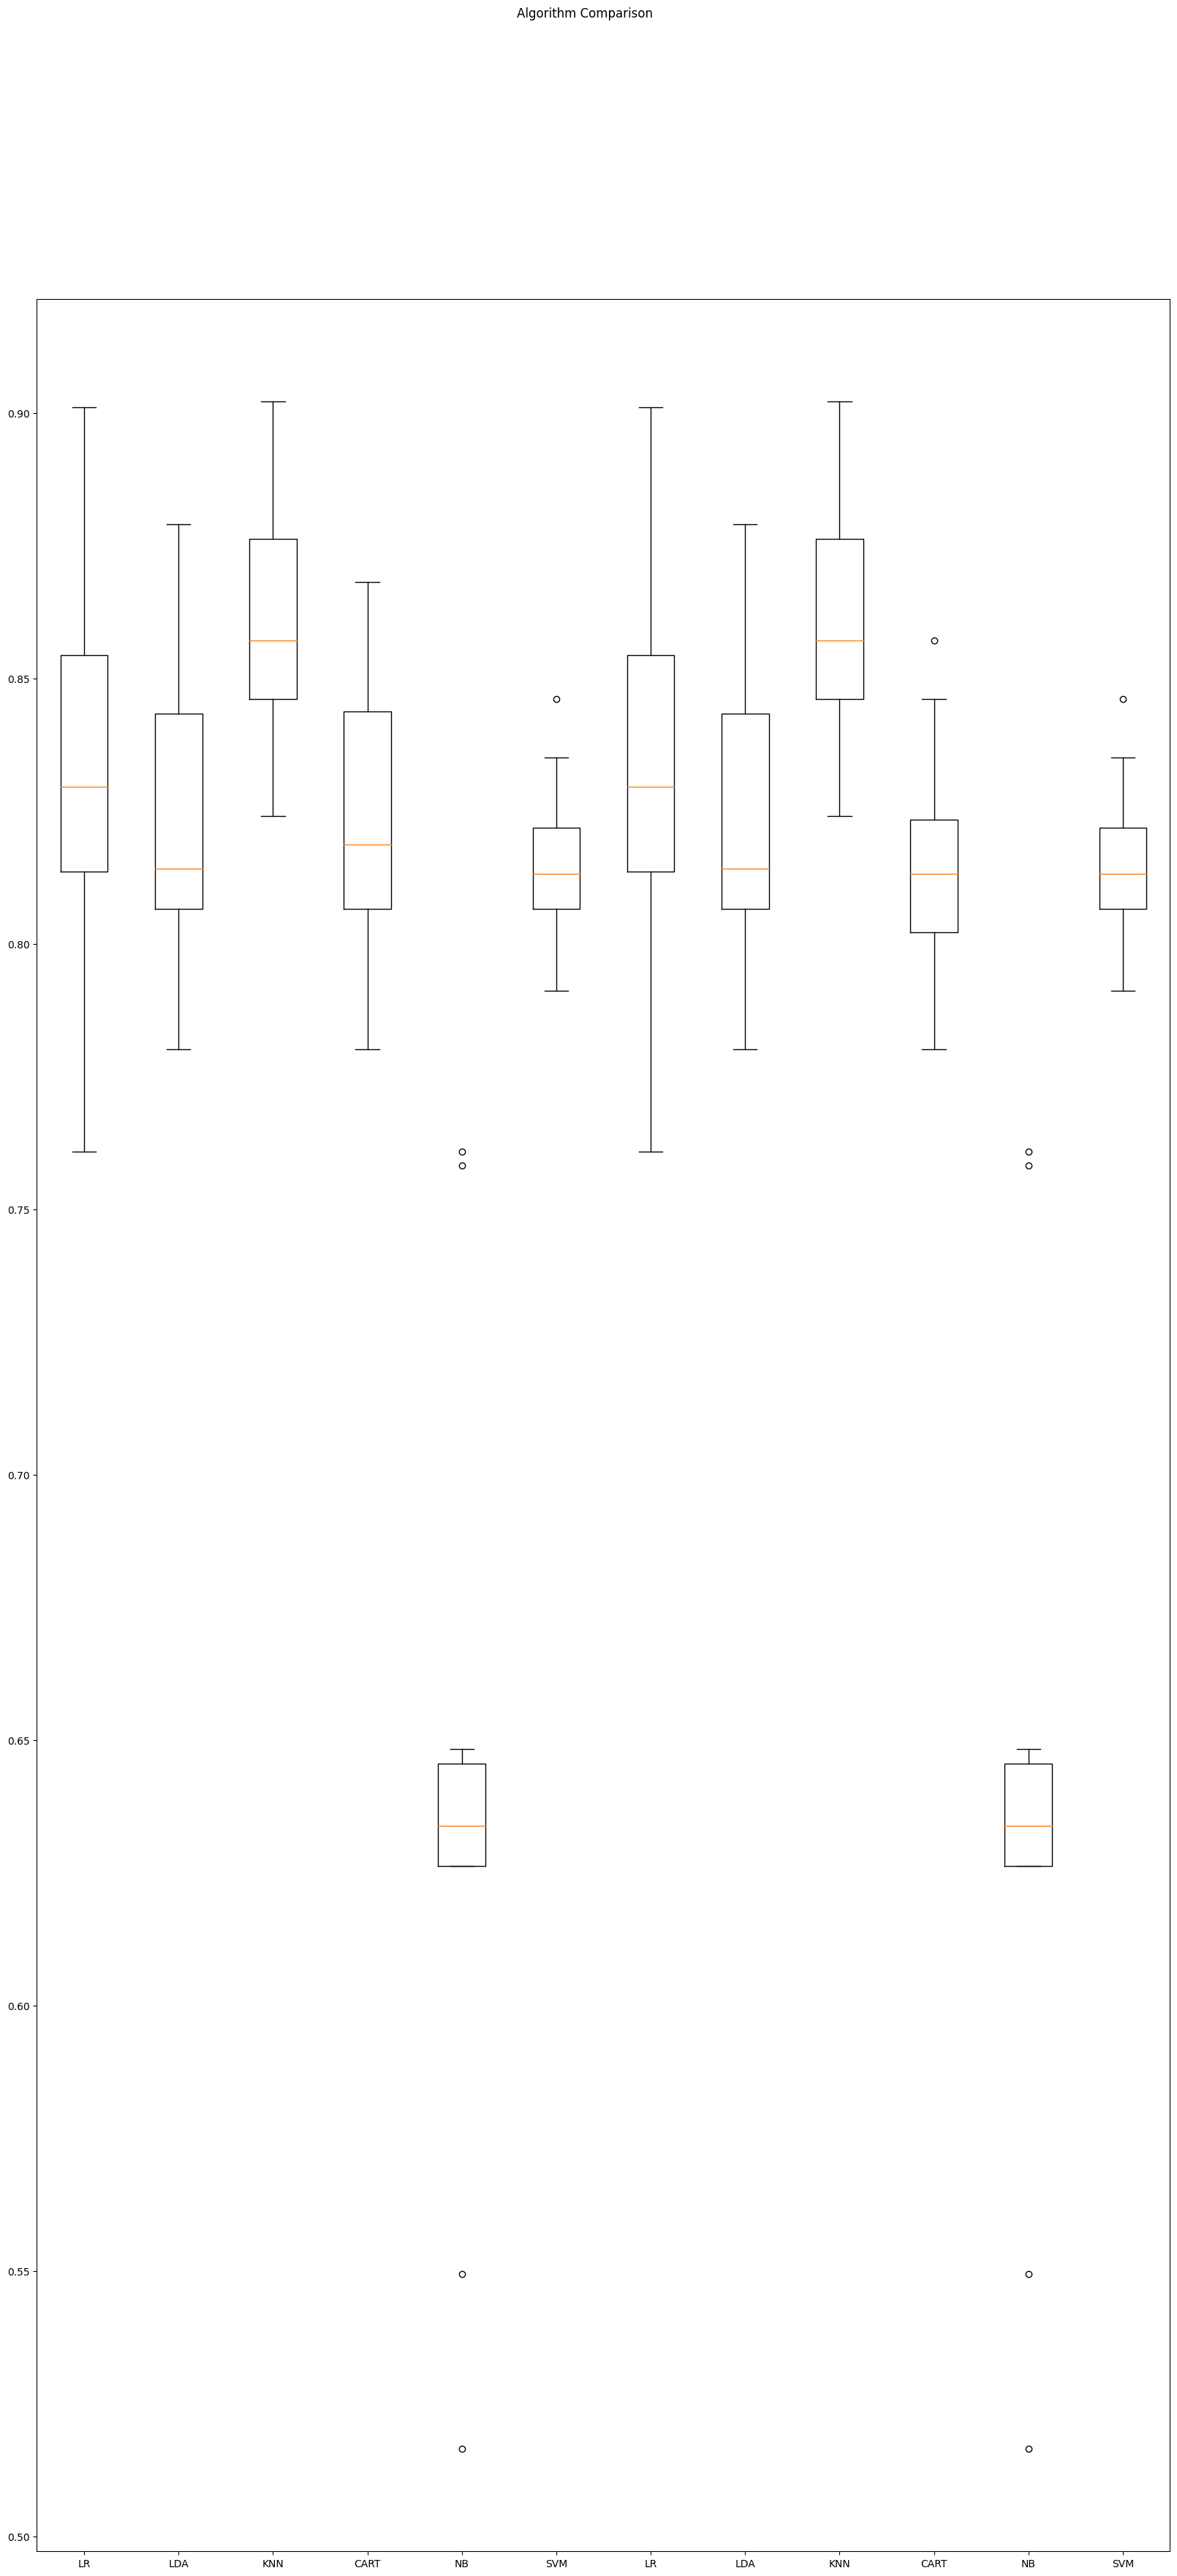

In [13]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.rcParams["figure.figsize"] = (12, 9)
pyplot.show()


# Data standarization 
#### In this section you will reuse the varibles that were previewsly created but the data will be scaled 


In [14]:
# Import StandardScaler from sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

# Create an instance of  StandardScaler and store it into a variable called scaler
scaler = StandardScaler()

# Fit the training data to the scaler by employing the fit function 
scaler = scaler.fit(X_train)

# Transform the training data to the scaler by employing the transform function and store it into a variable called
# X_scaled
X_scaled = scaler.transform(X_train)


In [15]:
X_scaled

array([[-0.23574766,  0.25003001, -0.58218794, ..., -0.20331802,
         0.02264271, -0.89973541],
       [ 1.45172247,  0.10193336, -0.54673825, ..., -0.00580793,
         0.02264271,  1.11143786],
       [-0.57324168,  0.45144145, -0.24794796, ...,  0.77873879,
         0.02264271, -0.89973541],
       ...,
       [ 0.43924039,  0.10193336, -0.81514308, ...,  0.39794125,
         0.02264271, -0.89973541],
       [-1.92321779,  1.14157182, -0.42519644, ...,  1.11945238,
         0.45466495,  1.11143786],
       [ 0.10174637,  0.10193336, -0.81007884, ..., -0.10310814,
        -0.40988073, -0.89973541]])

In [16]:
# Now you will create a for loop to test the different models with the scaled data

results = []
scoring = 'accuracy'

# Create an empty list called names
namess = []

# Create a for loop that iterates over two variables called name and model

for name, model in models:
    
# Create an instance of cross_val_score with the following parameters:
# model, X_scaled, Y_train, cv=10, scoring="accuracy" and store the resutls as
# a variable called cv_results
    cv_results = cross_val_score(model, X_scaled, Y_train, cv=10, scoring=scoring)

# Append cv_results  to the previously created empty list called results 
    results.append(cv_results)

# Append name to the previously created empty list called names
    namess.append(name)

# print the name and the mean of cv_results using the fuction mean
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.829013 (0.033338)
LDA: 0.824594 (0.027996)
KNN: 0.834448 (0.038008)
CART: 0.810296 (0.029934)
NB: 0.639130 (0.071340)
SVM: 0.855291 (0.038809)


After the data was scaled, the top 2 models were still the Logistic Regression and Classification Tree.

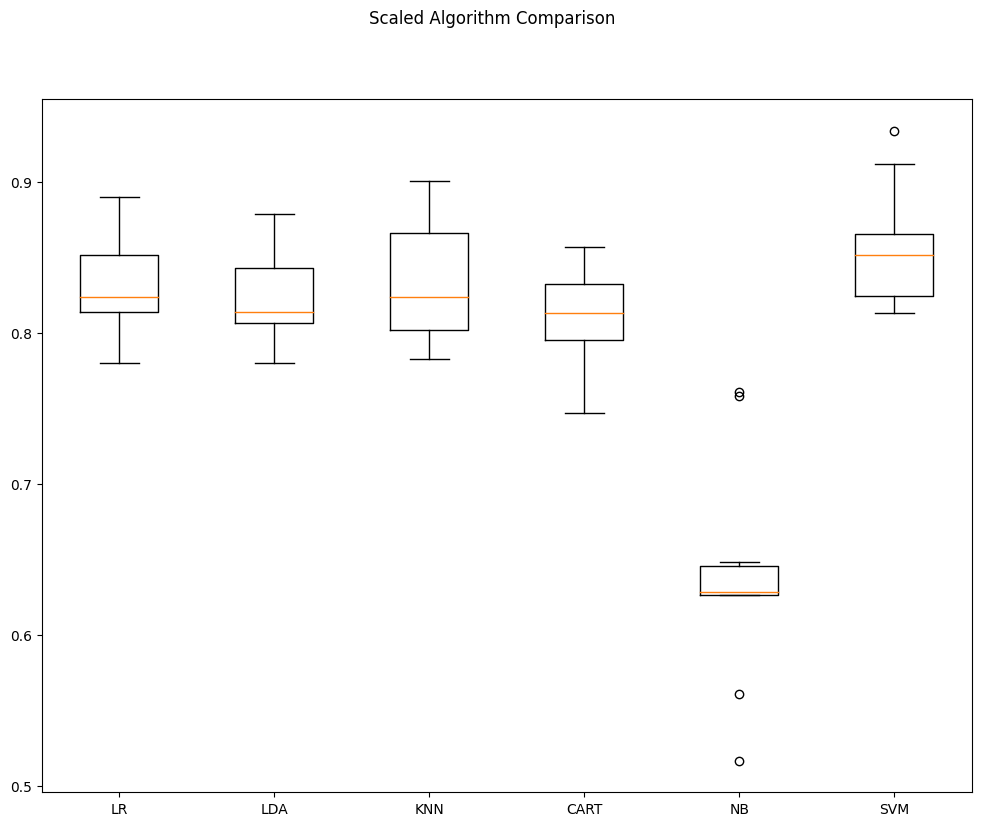

In [19]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(namess)
pyplot.show()


# Model Tunning

#### For this part, take a look a the results of the models and determine which group of models performed better, the scaled or regular. Out of the best group  select the two best performing models.

In [20]:
# If the best performing group of models were the scaled models, scale the validation data
# If not, leave this space blank
scalerr = StandardScaler().fit(X_test)
rescaledX = scalerr.transform(X_test)
# Create an instance of the Best performing model and store it into the variabe model
model = DecisionTreeClassifier()

# Create a grid of parameters to test for the Best performing model
# In the jupyter for the Project example (check the PDF in this folder or the video for Topic 2) there are 
#parameters available for each of the models

param_grid = {
    'max_depth': [2, 4, 8, 16],
    'min_samples_leaf': [0.01, 0.02, 0.03],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}
# Import KFold from sklearn.model_selection 


# Create an instance of Kfold with the following parameters: n_splits=5, random_state=123, shuffle=True
# Store it into a variable called kfold
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# Import GridSearchCV from sklearn.model_selection 
from sklearn.model_selection import GridSearchCV

# Create an instance of GridSearchCV with the following parameters: estimator=model, param_grid=param_grid, 
# scoring="accuracy", cv=kfold. Store it into a variable called grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)

# Fit the validation data to the grid by employing the fit function, store it into a variable called grid_result 
grid_result = grid.fit(rescaledX, Y_test)

# The following code will print the results of the grid search
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.855072 using {'max_depth': 16, 'max_features': 0.4, 'min_samples_leaf': 0.01}
0.842029 (0.055111) with: {'max_depth': 2, 'max_features': 0.2, 'min_samples_leaf': 0.01}
0.824831 (0.049305) with: {'max_depth': 2, 'max_features': 0.2, 'min_samples_leaf': 0.02}
0.798647 (0.066131) with: {'max_depth': 2, 'max_features': 0.2, 'min_samples_leaf': 0.03}
0.789855 (0.070734) with: {'max_depth': 2, 'max_features': 0.4, 'min_samples_leaf': 0.01}
0.820193 (0.054569) with: {'max_depth': 2, 'max_features': 0.4, 'min_samples_leaf': 0.02}
0.798551 (0.063604) with: {'max_depth': 2, 'max_features': 0.4, 'min_samples_leaf': 0.03}
0.780870 (0.038408) with: {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 0.01}
0.811594 (0.028382) with: {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 0.02}
0.806957 (0.050860) with: {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 0.03}
0.820000 (0.038702) with: {'max_depth': 2, 'max_features': 0.8, 'min_samples_leaf': 0.01}
0.829179 (0.05

In [21]:
# Create an instance of the Best performing model and store it into the variabe model
model = LogisticRegression(max_iter=3000)

# Create a grid of parameters to test for the Second Best performing model
# In the jupyter for the Project example (check the PDF in this folder or the video for Topic 2) there are parameters available for each of the models
param_grid = {
    'penalty': [ 'l2'],
    'C': [1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
         4.83293024e-03, 1.27427499e-2, 3.35981829e-02, 8.85866790e-02,
         2.3357214e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
         1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
         5.4559478e+02, 1.43844989e+01, 3.79269019e+03, 1.00000000e+04]

}

# Create an instance of Kfold with the following parameters: n_splits=5, random_state=123, shuffle=True
# Store it into a variable called kfold
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# Create an instance of GridSearchCV with the following parameters: estimator=model, param_grid=param_grid, 
# scoring="accuracy", cv=kfold. Store it into a variable called grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)

# Fit the validation data to the grid by employing the fit function, store it into a variable called grid_result 

grid_result = grid.fit(rescaledX, Y_test)
# The following code will print the results of the grid search

# The following code will print out the results of the grid search
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820386 using {'C': 0.0127427499, 'penalty': 'l2'}
0.815942 (0.056467) with: {'C': 0.0001, 'penalty': 'l2'}
0.815942 (0.056467) with: {'C': 0.00026366509, 'penalty': 'l2'}
0.815942 (0.056467) with: {'C': 0.000695192796, 'penalty': 'l2'}
0.815942 (0.056467) with: {'C': 0.00183298071, 'penalty': 'l2'}
0.815942 (0.056467) with: {'C': 0.00483293024, 'penalty': 'l2'}
0.820386 (0.052257) with: {'C': 0.0127427499, 'penalty': 'l2'}
0.811594 (0.040158) with: {'C': 0.0335981829, 'penalty': 'l2'}
0.802609 (0.050383) with: {'C': 0.088586679, 'penalty': 'l2'}
0.802609 (0.075491) with: {'C': 0.23357214, 'penalty': 'l2'}
0.794106 (0.069891) with: {'C': 0.615848211, 'penalty': 'l2'}
0.789758 (0.065606) with: {'C': 1.62377674, 'penalty': 'l2'}
0.789758 (0.065606) with: {'C': 4.2813324, 'penalty': 'l2'}
0.794106 (0.067132) with: {'C': 11.2883789, 'penalty': 'l2'}
0.789662 (0.071595) with: {'C': 29.7635144, 'penalty': 'l2'}
0.789662 (0.071595) with: {'C': 78.475997, 'penalty': 'l2'}
0.789662 (0.07

# Saving the model

In [22]:
# If the best performing models after modeling was the scaled, scale the validation data
# If not, leave this space blank
scalerr = StandardScaler().fit(X_test)
rescaledX = scalerr.transform(X_test)

# Create an instance of the best performing model and store it into the variabe model
model = DecisionTreeClassifier(max_depth= 16, max_features= 0.6, min_samples_leaf= 0.03)

# Fit the validation data to the model by employing the fit function
model.fit(rescaledX, Y_test)

# Estimate accuracy on validation dataset by employing the transform function on model
# store it into a variable called predictions
predictions = model.predict(rescaledX)

# Import accuracy_score from sklearn.metrics 
from sklearn.metrics import accuracy_score

# Import confusion_matrix from sklearn.metrics 
from sklearn.metrics import confusion_matrix

# Import classification_report from sklearn.metrics 
from sklearn.metrics import classification_report

# Inside a print statement, call the fuction accuracy_score, with the following parameters:
# Y_validation, predictions
print(accuracy_score(Y_test, predictions))

# Inside a print statement, call the fuction confusion_matrix, with the following parameters:
# Y_validation, predictions
print(confusion_matrix(Y_test, predictions))

# Inside a print statement, call the fuction classification_report, with the following parameters:
# Y_validation, predictions

print(classification_report(Y_test, predictions))

0.8947368421052632
[[174  12]
 [ 12  30]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       186
         1.0       0.71      0.71      0.71        42

    accuracy                           0.89       228
   macro avg       0.82      0.82      0.82       228
weighted avg       0.89      0.89      0.89       228

